## Fashion-MNIST Dataset (from Kaggle)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

- To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
- For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

### 1. Import the dataset 

Import the dataset `fashiom_mnist` from `keras.datasets`. Check the shape of the train and test datasets. Print couple of images to see how the samples from the dataset look like.

In [0]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [0]:
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

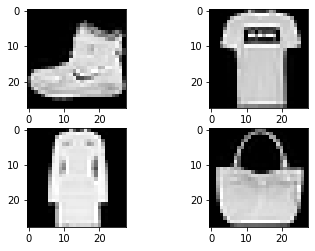

In [0]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[500], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[100], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [0]:
X_train.shape

(60000, 784)

In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2. Scale the Dataset

In [0]:
# # normalize inputs from 0-255 to 0-1
# X_train = X_train / 255
# X_test = X_test / 255


In [0]:
mean = np.mean(X_train)
stddev = np.std(X_train)

X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev

### 3. Reshape the datasets and implement one-hot-encoding on target variable

In [0]:
y_test.shape

(10000,)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
y_test[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_test.shape

(10000, 10)

### 4. Build the Baseline Model without CNN


In [0]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 0.4539 - accuracy: 0.8364 - val_loss: 0.3938 - val_accuracy: 0.8588
Epoch 2/100
 - 4s - loss: 0.3405 - accuracy: 0.8742 - val_loss: 0.3835 - val_accuracy: 0.8604
Epoch 3/100
 - 4s - loss: 0.3027 - accuracy: 0.8882 - val_loss: 0.3640 - val_accuracy: 0.8676
Epoch 4/100
 - 4s - loss: 0.2758 - accuracy: 0.8983 - val_loss: 0.3522 - val_accuracy: 0.8763
Epoch 5/100
 - 4s - loss: 0.2552 - accuracy: 0.9058 - val_loss: 0.3360 - val_accuracy: 0.8805
Epoch 6/100
 - 4s - loss: 0.2376 - accuracy: 0.9120 - val_loss: 0.3266 - val_accuracy: 0.8833
Epoch 7/100
 - 4s - loss: 0.2272 - accuracy: 0.9154 - val_loss: 0.3374 - val_accuracy: 0.8804
Epoch 8/100
 - 4s - loss: 0.2086 - accuracy: 0.9222 - val_loss: 0.3311 - val_accuracy: 0.8855
Epoch 9/100
 - 4s - loss: 0.2011 - accuracy: 0.9255 - val_loss: 0.3314 - val_accuracy: 0.8870
Epoch 10/100
 - 4s - loss: 0.1910 - accuracy: 0.9284 - val_loss: 0.3329 - val_accuracy: 0.8879
Epoch 11/

### 4. Build the CNN Model


In [0]:
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
mean = np.mean(X_train)
stddev = np.std(X_train)
#scale
X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

### 5. Compile fit, and evaluate the model and print the accuracy

In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 28s - loss: 0.4436 - accuracy: 0.8403 - val_loss: 0.3440 - val_accuracy: 0.8763
Epoch 2/100
 - 28s - loss: 0.3054 - accuracy: 0.8888 - val_loss: 0.3031 - val_accuracy: 0.8903
Epoch 3/100
 - 28s - loss: 0.2638 - accuracy: 0.9039 - val_loss: 0.2833 - val_accuracy: 0.8972
Epoch 4/100
 - 28s - loss: 0.2370 - accuracy: 0.9138 - val_loss: 0.2740 - val_accuracy: 0.8982
Epoch 5/100
 - 28s - loss: 0.2161 - accuracy: 0.9205 - val_loss: 0.2576 - val_accuracy: 0.9040
Epoch 6/100
 - 28s - loss: 0.2011 - accuracy: 0.9252 - val_loss: 0.2499 - val_accuracy: 0.9109
Epoch 7/100
 - 28s - loss: 0.1854 - accuracy: 0.9316 - val_loss: 0.2496 - val_accuracy: 0.9110
Epoch 8/100
 - 28s - loss: 0.1716 - accuracy: 0.9354 - val_loss: 0.2419 - val_accuracy: 0.9135
Epoch 9/100
 - 28s - loss: 0.1574 - accuracy: 0.9411 - val_loss: 0.2464 - val_accuracy: 0.9108
Epoch 10/100
 - 28s - loss: 0.1431 - accuracy: 0.9468 - val_loss: 0.2506 - val_accuracy: 0.9131

In [0]:
# Larger CNN for the fashion fashion_mnist Dataset
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D()) 
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error for fashion_mnist: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 35s 585us/step - loss: 0.7584 - accuracy: 0.7162 - val_loss: 0.5321 - val_accuracy: 0.7991
Epoch 2/100
60000/60000 [==============================] - 35s 582us/step - loss: 0.4708 - accuracy: 0.8291 - val_loss: 0.4133 - val_accuracy: 0.8524
Epoch 3/100
60000/60000 [==============================] - 35s 584us/step - loss: 0.4024 - accuracy: 0.8527 - val_loss: 0.3673 - val_accuracy: 0.8683
Epoch 4/100
60000/60000 [==============================] - 35s 585us/step - loss: 0.3680 - accuracy: 0.8657 - val_loss: 0.3489 - val_accuracy: 0.8737
Epoch 5/100
60000/60000 [==============================] - 35s 583us/step - loss: 0.3439 - accuracy: 0.8752 - val_loss: 0.3388 - val_accuracy: 0.8775
Epoch 6/100
60000/60000 [==============================] - 35s 585us/step - loss: 0.3245 - accuracy: 0.8810 - val_loss: 0.3167 - val_accuracy: 0.8855
Epoch 7/100
60000/60000 [=========================